In [7]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
from time import time

fig, ax = plt.subplots(figsize=(6,6))

circ = plt.Circle((0, 0), 0.1, facecolor="red", zorder=5)
ax.add_artist(circ)
rect = plt.Rectangle((0, 0.3), 1, 0.1, facecolor="black", zorder=2)
ax.add_artist(rect)

def draw_frame(frame_num):
    circ.center = (0.5, 1-(frame_num*0.01))

anim = FuncAnimation(fig, draw_frame, frames=100, interval=25)
t0 = time()
html = anim.to_html5_video()
t1 = time()
print("Seconds to generate:", t1-t0)
plt.close(fig)
HTML(html)

Seconds to generate: 4.745994806289673


In [2]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
from time import time

fig, ax = plt.subplots(figsize=(6,6))

def draw_frame(frame_num):
    ax.cla()
    ax.text(0.5, 0.5, str(frame_num), size=72, va='center', ha='center')

anim = FuncAnimation(fig, draw_frame, frames=10, interval=250)
t0 = time()
html = anim.to_html5_video()
t1 = time()
print("Seconds to generate:", t1-t0)
plt.close(fig)
HTML(html)

Seconds to generate: 1.0305085182189941


# Part 2

In [11]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML, display
from time import time

fig, ax = plt.subplots(figsize=(6,6))

circ = plt.Circle((0, 0), 0.1, facecolor="red", zorder=3)
ax.add_artist(circ)
rect = plt.Rectangle((0, 0.3), 1, 0.1, facecolor="black", zorder=2)
ax.add_artist(rect)

seconds = 2
fps = 100 # frames-per second
frame_count = fps*seconds

def draw_frame(frame_num):
    percent = frame_num / frame_count
    if percent < 0.5:
        y = 1 - percent
    else:
        y = 0.5 + (percent-0.5)
    circ.center = (0.5, y)

debug_frame = None    

if debug_frame != None:
    draw_frame(debug_frame)
else:
    anim = FuncAnimation(fig, draw_frame, frames=frame_count, interval=1000/fps)
    t0 = time()
    html = anim.to_html5_video()
    t1 = time()
    print("Seconds to generate:", t1-t0)
    plt.close(fig)
    display(HTML(html))

Seconds to generate: 9.230194330215454


# Part 3

In [26]:
import pandas as pd
from datetime import timedelta, datetime, date

In [14]:
df = pd.read_csv("crime.csv")[["IncidentDate", "Address"]]
df.head()

,IncidentDate,Address
0,2005-10-07T03:33:00.000Z,700 Block of E. Washington Ave. ...
1,2005-03-03T05:42:00.000Z,First St & E Washington Ave ...
2,2005-03-02T14:30:00.000Z,8 New Berm Court ...
3,2005-03-03T13:30:00.000Z,4300 Lumley Rd ...
4,2005-03-04T19:45:00.000Z,211 S. Carroll Street ...


In [19]:
type(df.iloc[0][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df["IncidentDate"] = pd.to_datetime(df["IncidentDate"])

In [22]:
df["date"] = df["IncidentDate"].dt.date
df.head()

,IncidentDate,Address,date
0,2005-10-07 03:33:00+00:00,700 Block of E. Washington Ave. ...,2005-10-07
1,2005-03-03 05:42:00+00:00,First St & E Washington Ave ...,2005-03-03
2,2005-03-02 14:30:00+00:00,8 New Berm Court ...,2005-03-02
3,2005-03-03 13:30:00+00:00,4300 Lumley Rd ...,2005-03-03
4,2005-03-04 19:45:00+00:00,211 S. Carroll Street ...,2005-03-04


In [31]:
df["percent"] = (df["IncidentDate"] - df["IncidentDate"].dt.floor("d")) / timedelta(days=1)
df.head()

,IncidentDate,Address,date,percent
0,2005-10-07 03:33:00+00:00,700 Block of E. Washington Ave. ...,2005-10-07,0.147917
1,2005-03-03 05:42:00+00:00,First St & E Washington Ave ...,2005-03-03,0.237500
2,2005-03-02 14:30:00+00:00,8 New Berm Court ...,2005-03-02,0.604167
3,2005-03-03 13:30:00+00:00,4300 Lumley Rd ...,2005-03-03,0.562500
4,2005-03-04 19:45:00+00:00,211 S. Carroll Street ...,2005-03-04,0.822917


In [33]:
df = df[df["date"] == date(2008,10,12)].copy()
df

,IncidentDate,Address,date,percent
996,2008-10-12 04:26:00+00:00,3019 E. Washington Ave.,2008-10-12,0.184722
997,2008-10-12 08:00:00+00:00,4300 Doncaster Dr,2008-10-12,0.333333
998,2008-10-12 08:00:00+00:00,500 State St.,2008-10-12,0.333333
999,2008-10-12 06:30:00+00:00,123 E. Doty St.,2008-10-12,0.270833
1000,2008-10-12 07:10:00+00:00,400 Block N. Henry St.,2008-10-12,0.298611
1001,2008-10-12 05:27:00+00:00,500 N. Lake St.,2008-10-12,0.227083
1003,2008-10-12 02:24:00+00:00,E. Johnson Street @ Pinckney Street,2008-10-12,0.100000
1008,2008-10-12 23:31:00+00:00,1600 block Troy Drive,2008-10-12,0.979861
1009,2008-10-12 05:06:00+00:00,600 block of State Street,2008-10-12,0.212500
1011,2008-10-12 05:06:00+00:00,100 block South Randall Avenue,2008-10-12,0.212500


In [50]:
import requests
from shapely.geometry import Point

def get_api_key():
    with open("secret-key.txt") as f:
        return f.read().strip()

def get_loc(addr):
    addr += " Madison WI"
    addr = addr.replace(" ", "+")
    url = "https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}"
    url = url.format(addr, get_api_key())
    r = requests.get(url)
    r.raise_for_status()
    coord = r.json()["results"][0]['geometry']['location']
    return Point(coord['lng'], coord['lat'])

In [52]:
print(get_loc("500 State St."))

POINT (-89.3934697 43.074861)


In [53]:
df["geometry"] = None
for idx in df.index:
    addr = df.loc[idx, "Address"]
    pt = get_loc(addr)
    df.loc[idx, 'geometry'] = pt

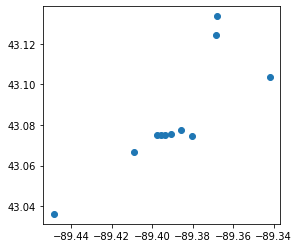

In [56]:
import geopandas

gdf = geopandas.GeoDataFrame(df)
gdf.plot()

In [57]:
gdf[["percent", "geometry"]].to_file("crime.shp")

In [ ]:
#now use different notebook to prevent use of API